# Reading data from a REST web service API

The goal of this notebook session is to read a "comma separated value" data file from a REST web service API of a data repository and load it into a usable Python data structure that can be used for further analysis. In this section, we will explore Python tools to read a REST web service end point and download data directly into a Python data structure.

`REST` (*Re*spresentational *S*tate *T*ransfer) relies on the existing HTTP verbs (e.g., `POST`, `GET`, `PUT`, and `DELETE`) and request-response patterns to effectively support the actions of a standard application programmable interface (API) for creating a software excution environment of an Internet client/server model. The most common REST action for a web client is to *read* a web-based resource (a data file, for example) from a web server using the HTTP `GET` request method. The four verbs listed above provide the core web-services for *Create*, *Read*, *Update*, and *Delete* methods of REST-based applications. The benefit of REST web services is that the web-client and web-server execution stack can be implemented using completely different software environemnts and different operating systems.

<img src='./web-service.png'/>

The data file we will use in this session is from a non-active research site of the *Long Term Ecological Research Network*, called *North Inlet LTER*. The data consist of daily water samples from from 1978 to 1992. This data is available from the *Environmental Data Initiative* (EDI) [data repository](https://portal.edirepository.org/nis) under the repository identifier [knb-lter-nin.1.1](https://portal.edirepository.org/nis/mapbrowse?scope=knb-lter-nin&identifier=1).

The EDI data repository software, called *PASTA*, provides a full web-service API that allows data producers to upload data packages to the repository using HTTP `POST` and `PUT` verbs, as well as data package reading services using the HTTP `GET` verb for data consumers. We will use the Python `requests` package to access the data file of data package knb-lter-nin.1.1 and load it into a Python data structure. The PASTA API method that we will use is called [*Read Data Entity*](https://pasta.lternet.edu/package/docs/api#GET%20:%20/data/eml/{scope}/{identifier}/{revision}/{entityId}).

#### References
1. Environmental Data Initiative [data portal](https://portal.edirepository.org/nis)
1. PASTA+ web service API at [read the docs](http://pastaplus-core.readthedocs.io/en/latest/index.html)
1. Python [requests](http://docs.python-requests.org/en/master/)

### Install Python `requests` using `pip` from BASH.

In [6]:
!pip install requests

### Download our data file `LTER.NIN.DWS.csv` from the PASTA data repository using the Python `requests` package.

In [2]:
import requests

In [3]:
url = 'https://pasta.lternet.edu/package/data/eml/knb-lter-nin/1/1/DailyWaterSample-NIN-LTER-1978-1992'
r = requests.get(url)

In [4]:
print('{code}: {msg}'.format(code=r.status_code, msg=r.reason))

200: OK


In [5]:
for header in r.headers:
    print('{header}: {value}'.format(header=header, value=r.headers[header]))

Server: Apache-Coyote/1.1
Content-Disposition: attachment; filename=LTER.NIN.DWS.csv
Web-Service: DataPackageManager-1.0
Content-Type: text/csv
Date: Wed, 02 May 2018 19:02:19 GMT
Content-Length: 924291


In [6]:
r.text[:256]

'Date,transect,water_temp,SAL,TNW,TNF,TPW,TPF,POP,NHN,NNN,CHEM,TOC,DOC,POC\r\n9/1/1978,TC,-9.9,-9.9,-99.9,-99.9,-9.9,-9.9,-9.999,-9.9,-9.99,-999,2,-9.9,-9.9\r\n9/2/1978,TC,-9.9,-9.9,-99.9,-99.9,-9.9,-9.9,-9.999,-9.9,-9.99,-999,2,-9.9,-9.9\r\n9/3/1978,TC,-9.9,-9.9'

In [7]:
tbl = [ _.split(',') for _ in r.text.strip().split('\r\n')]

In [8]:
len(tbl)

13177

In [9]:
header = tbl[0] # Set header from original table
print(header)

['Date', 'transect', 'water_temp', 'SAL', 'TNW', 'TNF', 'TPW', 'TPF', 'POP', 'NHN', 'NNN', 'CHEM', 'TOC', 'DOC', 'POC']


In [10]:
tbl = tbl[1:] # Remove header; extract only string values that represent the real table data
len(tbl)

13176

In [11]:
# Populate data frame with coerced (converted) values from data table in column-major order

from datetime import datetime

df = [[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
for line in tbl:
    date = datetime.strptime(line[0], '%m/%d/%Y')
    df[0].append(date)              # Date as datetime
    df[1].append(line[1])           # transect as unicode string
    df[2].append(float(line[2]))    # water_temp as float
    df[3].append(float(line[3]))    # SAL as float
    df[4].append(float(line[4]))    # TNW as float
    df[5].append(float(line[5]))    # TNF as float
    df[6].append(float(line[6]))    # TPW as float
    df[7].append(float(line[7]))    # TPF as float
    df[8].append(float(line[8]))    # POP as float
    df[9].append(float(line[9]))    # NHN as float
    df[10].append(float(line[10]))  # NNN as float
    df[11].append(int(line[11]))    # CHEM as integer
    df[12].append(float(line[12]))  # TOC as float
    df[13].append(float(line[13]))  # DOC as float
    df[14].append(float(line[14]))  # POC as float

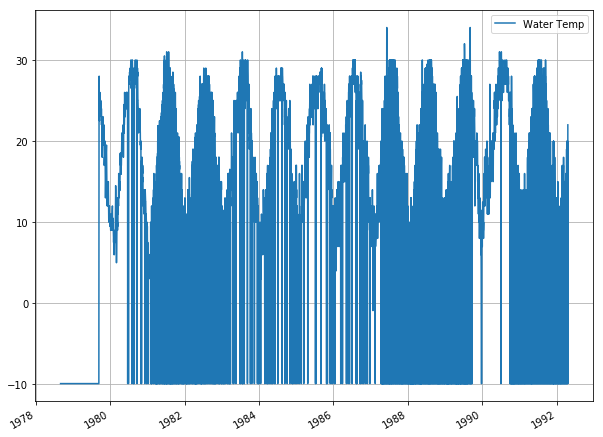

In [13]:
# Access the "Date" and "water_temp" columns and plot the data

import matplotlib
import matplotlib.pyplot as plt

date = df[0]
water_temp = df[2]
    
fig, ax = plt.subplots()
ax.plot(date, water_temp, label='Water Temp')
ax.grid(True)
fig.autofmt_xdate()
fig.set_size_inches(10, 8)
plt.legend()
plt.show()